Zachary Loschinskey
Dr. Economo Rotation
Play around with ephys data

In [1]:
"""
Import Libraries
"""

import zutils

import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy import stats
import pandas as pd

from time import sleep
import os
from pynwb import NWBHDF5IO
import numpy as np

In [2]:
"""
Load the Data
"""
# Data Folder
dataDir = 'C:\\Users\\zachl\\OneDrive\\BU_YEAR1\\Economo_Rotation\\data\\'

# File Parameters
sub = ['484675']
date = ['20210318',  '20210319']

# LOAD DATA
data = zutils.load_data(dataDir, sub, date)

Loading data for sub-['484675']:['20210318', '20210319'] from 
Data directory: C:\Users\zachl\OneDrive\BU_YEAR1\Economo_Rotation\data\
['sub-484675_ses-20210318T122039_behavior+ecephys+ogen.nwb'
 'sub-484675_ses-20210319T121514_behavior+ecephys+ogen.nwb']


In [3]:
# Just look at first file for now
sub1 = data[0]

movementDF = zutils.get_behavioral_timeseries(sub1)
# # The Raw Data Spike Data is Found Here
# units = sub1.units.to_dataframe()

# # The tiral times are found here
# trials = sub1.trials.to_dataframe()


In [4]:
movementDF["JawDist_Normalized"]

0        -0.077819
1        -0.168207
2        -0.106333
3        -0.067007
4        -0.149649
            ...   
832940   -0.769566
832941   -0.756718
832942   -0.690712
832943   -0.682444
832944   -0.698899
Name: JawDist_Normalized, Length: 832945, dtype: float64

In [10]:
sub1

root pynwb.file.NWBFile at 0x2290074011920
Fields:
  acquisition: {
    BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>,
    BehavioralTimeSeries <class 'pynwb.behavior.BehavioralTimeSeries'>
  }
  devices: {
    19011111142 (neuropixels 2.0 - MS) <class 'pynwb.device.Device'>,
    19011111612 (neuropixels 2.0 - MS) <class 'pynwb.device.Device'>,
    19011111614 (neuropixels 2.0 - SS) <class 'pynwb.device.Device'>,
    19122511894 (neuropixels 2.0 - SS) <class 'pynwb.device.Device'>,
    OBIS470 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    19011111142 1-96; 1281-1376; 2561-2656; 3841-3936 <class 'pynwb.ecephys.ElectrodeGroup'>,
    19011111612 1-96; 1281-1376; 2561-2656; 3841-3936 <class 'pynwb.ecephys.ElectrodeGroup'>,
    19011111614 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>,
    19122511894 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: high tone vs. low tone
  experimenter: ['susu']
  file_create_date: [datetime.datetime(2023, 8, 18, 22, 30, 20, 845636, tzinfo=tzoffset(None, -18000))]
  identifier: SC060_20210318_122039_s1
  institution: Janelia Research Campus
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (1,), type "|O">
  ogen_sites: {
    OBIS470_4 <class 'pynwb.ogen.OptogeneticStimulusSite'>,
    OBIS470_5 <class 'pynwb.ogen.OptogeneticStimulusSite'>,
    OBIS470_6 <class 'pynwb.ogen.OptogeneticStimulusSite'>
  }
  related_publications: ['']
  session_start_time: 2021-03-18 12:20:39-05:00
  subject: subject pynwb.file.Subject at 0x2290962536016
Fields:
  age__reference: birth
  date_of_birth: 2020-11-24 00:00:00-06:00
  description: SC060
  sex: M
  species: Mus musculus
  subject_id: 484675

  timestamps_reference_time: 2021-03-18 12:20:39-05:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

In [11]:
sub1.electrodes["location"]

In [12]:
sub1

root pynwb.file.NWBFile at 0x2290074011920
Fields:
  acquisition: {
    BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>,
    BehavioralTimeSeries <class 'pynwb.behavior.BehavioralTimeSeries'>
  }
  devices: {
    19011111142 (neuropixels 2.0 - MS) <class 'pynwb.device.Device'>,
    19011111612 (neuropixels 2.0 - MS) <class 'pynwb.device.Device'>,
    19011111614 (neuropixels 2.0 - SS) <class 'pynwb.device.Device'>,
    19122511894 (neuropixels 2.0 - SS) <class 'pynwb.device.Device'>,
    OBIS470 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    19011111142 1-96; 1281-1376; 2561-2656; 3841-3936 <class 'pynwb.ecephys.ElectrodeGroup'>,
    19011111612 1-96; 1281-1376; 2561-2656; 3841-3936 <class 'pynwb.ecephys.ElectrodeGroup'>,
    19011111614 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>,
    19122511894 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: high tone vs. low tone
  experimenter: ['susu']
  file_create_date: [datetime.datetime(2023, 8, 18, 22, 30, 20, 845636, tzinfo=tzoffset(None, -18000))]
  identifier: SC060_20210318_122039_s1
  institution: Janelia Research Campus
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (1,), type "|O">
  ogen_sites: {
    OBIS470_4 <class 'pynwb.ogen.OptogeneticStimulusSite'>,
    OBIS470_5 <class 'pynwb.ogen.OptogeneticStimulusSite'>,
    OBIS470_6 <class 'pynwb.ogen.OptogeneticStimulusSite'>
  }
  related_publications: ['']
  session_start_time: 2021-03-18 12:20:39-05:00
  subject: subject pynwb.file.Subject at 0x2290962536016
Fields:
  age__reference: birth
  date_of_birth: 2020-11-24 00:00:00-06:00
  description: SC060
  sex: M
  species: Mus musculus
  subject_id: 484675

  timestamps_reference_time: 2021-03-18 12:20:39-05:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

In [13]:
"""
Setting up How to make Pretty Plot
"""
# Get Spike Data
# print(sub1.units[0].keys())
spikeTimes = np.array(sub1.units[0]["spike_times"][0])
print(len(spikeTimes))

spikeMatrix = [1,3, 4,6]
spikeMatrix

1800


[1, 3, 4, 6]

In [6]:
spikeTimes = sub1.units["spike_times"]

spikeMatrix = []
for row in spikeTimes:
        spikeMatrix.append(np.array(row))

print(spikeTimes)


In [15]:
spikeMatrix[0]

array([9.44829680e-01, 9.54563182e-01, 2.76022781e+00, ...,
       3.03911716e+03, 3.04680243e+03, 3.05322716e+03])

<Figure size 640x480 with 0 Axes>

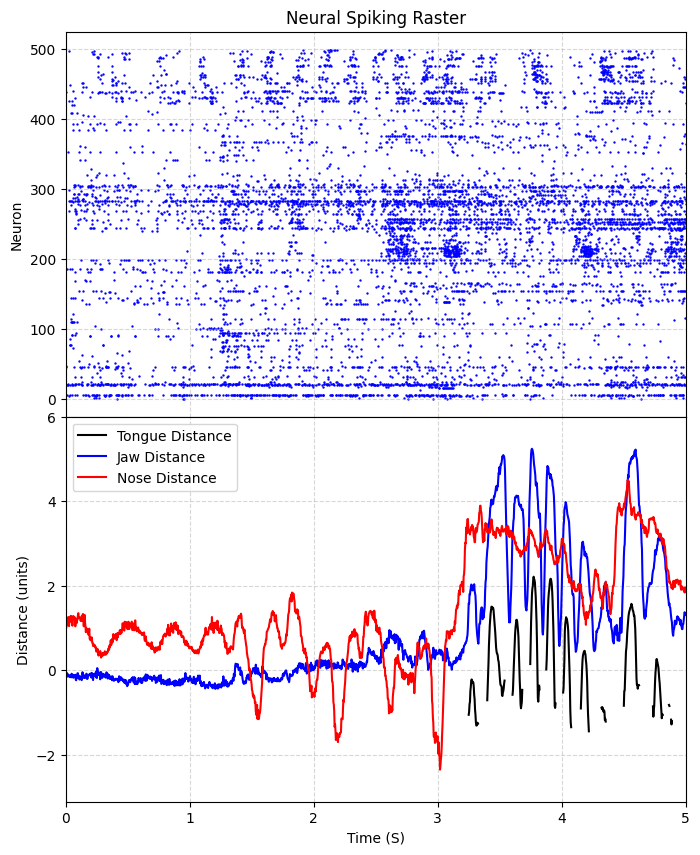

In [41]:

""" 
Define Function inputs
"""
df = sub1

""" 
Prepare space for plotting
"""
# Clear Existing Figure
plt.clf()

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=False)


""" 
Plot the Spiking Data
"""
# Add Rows to the spike matrix
spikeTimes = df.units["spike_times"]
spikeMatrix = []
for row in spikeTimes:
        spikeMatrix.append(np.array(row))

# Loop to create the raster for each row
for i in range(500):  # len(spikeMatrix)
    # Create Y ticks
    yValue = np.ones(len(spikeMatrix[i])) * i

    # Plot Scatter
    axs[0].scatter(np.array(spikeMatrix[i]), yValue, marker='.', color='b', s=2)


"""
Plot Movement Data
"""
# Get Behavioral Data
movementDF = zutils.get_behavioral_timeseries(df)

# Plot the tongue distance
axs[1].plot(movementDF["TimeStamps"], movementDF[f'TongueDist_Normalized'], color='black')

# Plot the jaw distance
axs[1].plot(movementDF["TimeStamps"], movementDF[f'JawDist_Normalized'], color='b')

# Plot the nose distance
axs[1].plot(movementDF["TimeStamps"], movementDF[f'NoseDist_Normalized'], color='r')

maxVal = max(np.nanmax(movementDF[f'TongueDist_Normalized']), np.nanmax(movementDF[f'JawDist_Normalized']), np.nanmax(movementDF[f'NoseDist_Normalized']))
minVal = max(np.nanmin(movementDF[f'TongueDist_Normalized']), np.nanmin(movementDF[f'JawDist_Normalized']), np.nanmin(movementDF[f'NoseDist_Normalized']))


""" 
Customizing the Plot Settings
"""
# Remove the x-axis from the first subplot
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Set the x-axis limits based on your data
axs[0].set_xlim(0, 5)
axs[0].set_title("Neural Spiking Raster")

# Add labels and legend
axs[0].set_ylabel('Neuron')

# Set xlim and ylim
axs[1].set_xlim(0, 5)
axs[1].set_ylim(minVal-0.5, 6)
axs[1].legend(['Tongue Distance', 'Jaw Distance', 'Nose Distance'])

# Add labels
axs[1].set_xlabel('Time (S)')
axs[1].set_ylabel('Distance (units)')

# Add a grid to the second subplot
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Adjust the spacing between subplots (bottom and top)
plt.subplots_adjust(hspace=-0)

# Show the figure
plt.show()


In [17]:
# how to check accuracy of electrode placement -- ask mike
# find region with colliculus in midbrain
# See that the neuropixel is looking at different regions across its length
# In general top of midbrain neuropixel probes are looking at superior colliculus
# Yujin found in mrn there is anticorrelation with licking movment

# Create table of trials that use the midbrain and try to discern which portion of neuropixels we will use for the mrn
# Jaw, Tongue, and Nose Movements
# raster plot in python